In [1]:
import numpy as np
import tensorflow as tf

In [2]:
seto_img = 'IRIS/iris-setosa/'
versi_img = 'IRIS/iris-versicolour/'
virgi_img = 'IRIS/iris-virginica/'

In [3]:
w,h = 150, 150
input_shape = (w, h, 3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [5]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    'IRIS/',
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 421 images belonging to 3 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

model = Sequential()
model.add(InputLayer(input_shape=(150, 150, 3)))

In [7]:
# 1st conv block

model.add(Conv2D(50, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [8]:
# 2nd convo block

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [9]:
# 3rd convo block

model.add(Conv2D(75, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [12]:
model.add(Dense(3, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 50)      1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        28864     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 75)        43275     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 75)        0

In [15]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'IRIS/',  
    target_size=(w, h),           
    batch_size=32,                    
    class_mode='categorical'          
)

Found 421 images belonging to 3 classes.


In [16]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50


4/4 [==============================] - 116s 28s/step - loss: 1.4786 - accuracy: 0.3919 - val_loss: 1.4642 - val_accuracy: 0.1591
Epoch 2/50
4/4 [==============================] - 92s 18s/step - loss: 1.2653 - accuracy: 0.4038 - val_loss: 1.1788 - val_accuracy: 0.1615
Epoch 3/50
4/4 [==============================] - 45s 7s/step - loss: 1.1754 - accuracy: 0.4276 - val_loss: 1.0801 - val_accuracy: 0.2755
Epoch 4/50
4/4 [==============================] - 23s 5s/step - loss: 1.1398 - accuracy: 0.4466 - val_loss: 0.9966 - val_accuracy: 0.6580
Epoch 5/50
4/4 [==============================] - 20s 4s/step - loss: 1.0702 - accuracy: 0.4608 - val_loss: 0.9853 - val_accuracy: 0.6603
Epoch 6/50
4/4 [==============================] - 17s 3s/step - loss: 1.0612 - accuracy: 0.4822 - val_loss: 0.9583 - val_accuracy: 0.6580
Epoch 7/50
4/4 [==============================] - 24s 8s/step - loss: 1.0535 - accuracy: 0.5012 - val_loss: 0.9248 - val_accuracy: 0.6390
Epoch 8/50
4/4 [=============

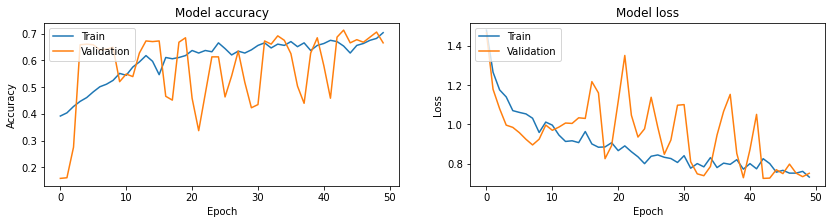

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

## Transfer Learning using VGG16

In [18]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.summary()    

58889256/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [19]:
vgg_features_train = base_model.predict(train_generator)
vgg_features_val = base_model.predict(val_generator)

14/14 [==============================] - 47s 3s/step


In [20]:
vgg_features_train

array([[[[9.6867490e-01, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 9.9759471e-01, 0.0000000e+00],
         [5.7477844e-01, 0.0000000e+00, 1.0651972e+00, ...,
          0.0000000e+00, 3.2612872e-01, 0.0000000e+00],
         [7.9907763e-01, 0.0000000e+00, 8.3126783e-01, ...,
          0.0000000e+00, 9.3871117e-01, 0.0000000e+00],
         [9.7804302e-01, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 1.4296964e+00, 0.0000000e+00]],

        [[1.6502249e-01, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 1.0524895e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 1.0206010e+00, ...,
          0.0000000e+00, 7.7171135e-01, 0.0000000e+00],
         [1.0174600e+00, 0.0000000e+00, 5.9191799e-01, ...,
          0.0000000e+00, 3.9891863e-01, 0.0000000e+00],
         [5.7161117e-01, 0.0000000e+00, 6.1852646e-01, ...,
          0.0000000e+00, 8.8491583e-01, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 2.8798974e-01, ...,
        

In [21]:
vgg_features_val

array([[[[0.10708034, 0.        , 0.        , ..., 0.        ,
          0.55773216, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.5377371 , 0.14319195],
         [0.11952789, 0.        , 0.87452036, ..., 0.        ,
          0.7710786 , 0.        ],
         [0.31210434, 0.        , 0.97730017, ..., 0.        ,
          0.8341267 , 0.        ]],

        [[0.72455835, 0.        , 0.4482646 , ..., 0.        ,
          0.        , 0.        ],
         [0.04202342, 0.        , 0.28592038, ..., 0.        ,
          0.        , 0.17639895],
         [0.15192032, 0.        , 2.2362795 , ..., 0.58383316,
          0.        , 0.07801145],
         [0.6617896 , 0.        , 1.9002385 , ..., 0.8735276 ,
          0.49485636, 0.        ]],

        [[1.47084   , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [1.5119183 , 0.        , 0.70357096, ..., 0.        ,
          0.        , 0.        ],
         [1.0248

In [22]:
from keras.utils import to_categorical

train_labels_encoded = to_categorical(train_generator.labels)
val_labels_encoded = to_categorical(val_generator.labels)

In [23]:
train_labels_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [24]:
val_labels_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [35]:
model2 = Sequential()

model2.add(Flatten(input_shape=(8192,)))  # Input shape should match the shape of flattened_vgg_features_train and flattened_vgg_features_val

model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(3, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# Print model summary
model2.summary()

# Enable eager execution
tf.config.run_functions_eagerly(True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               819300    
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_5 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                      

In [36]:
history2 = model2.fit(flattened_vgg_features_train, train_labels_encoded,
                      epochs=50, batch_size=128,
                      validation_data=(flattened_vgg_features_val, val_labels_encoded))

Epoch 1/50


C:\Users\HP\anaconda3\envs\py3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 1s 160ms/step - loss: 1.6736 - accuracy: 0.2969 - val_loss: 0.9361 - val_accuracy: 0.6390
Epoch 2/50
4/4 [==============================] - 0s 124ms/step - loss: 1.4216 - accuracy: 0.3872 - val_loss: 0.9418 - val_accuracy: 0.6223
Epoch 3/50
4/4 [==============================] - 0s 126ms/step - loss: 1.2279 - accuracy: 0.4347 - val_loss: 0.9695 - val_accuracy: 0.5772
Epoch 4/50
4/4 [==============================] - 0s 116ms/step - loss: 1.2197 - accuracy: 0.4418 - val_loss: 0.9678 - val_accuracy: 0.5796
Epoch 5/50
4/4 [==============================] - 0s 136ms/step - loss: 1.1937 - accuracy: 0.4774 - val_loss: 0.9669 - val_accuracy: 0.5891
Epoch 6/50
4/4 [==============================] - 0s 120ms/step - loss: 1.1635 - accuracy: 0.4703 - val_loss: 0.9757 - val_accuracy: 0.5891
Epoch 7/50
4/4 [==============================] - 0s 132ms/step - loss: 1.1593 - accuracy: 0.4774 - val_loss: 0.9857 - val_accuracy: 0.5843
Epoch 8/50
4/4 [===============

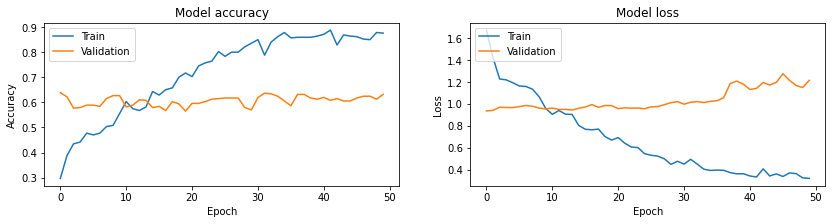

In [37]:
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

In [38]:
from keras.models import load_model

model.save('Lab5/CNN_model.h5')
model.save('Lab5/VGG16_model.h5')

C:\Users\HP\anaconda3\envs\py3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 76ms/step


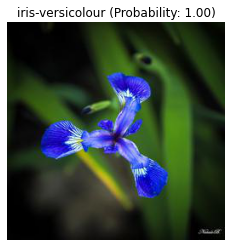

In [46]:
import random
import os
from glob import glob
from keras.preprocessing import image

model = load_model('Lab5/VGG16_model.h5')

iris_folder = 'IRIS/'

class_folders = glob(os.path.join(iris_folder, '*'))

random_class = random.choice(class_folders)

image_paths = glob(os.path.join(random_class, '*.jpg'))

random_image_path = random.choice(image_paths)

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

preprocessed_image = preprocess_image(random_image_path)

predictions = model.predict(preprocessed_image)

predicted_class = np.argmax(predictions)

predicted_class_name = os.path.basename(random_class)
probability_score = predictions[0][predicted_class]

img = image.load_img(random_image_path)
plt.imshow(img)
plt.title(f"{predicted_class_name} (Probability: {probability_score:.2f})")
plt.axis('off')
plt.show()

